In [22]:
with open(r'cheater_PGNs\white_cheater_PGN2.txt') as f:
    pgn = f.read()

moves = []
for element in pgn.split():
    if element[-1] != '.' and element != '0-1' and element != '1-0' and element != '1/2-1/2':
        moves.append(element)

In [23]:
from stockfish import Stockfish

stockfish = Stockfish(path="D:\Programowanie\StockFish\stockfish_15.1_win_x64_avx2\stockfish-windows-2022-x86-64-avx2.exe")

# stockfish.update_engine_parameters({"Threads": 12})
# stockfish.set_depth(16)

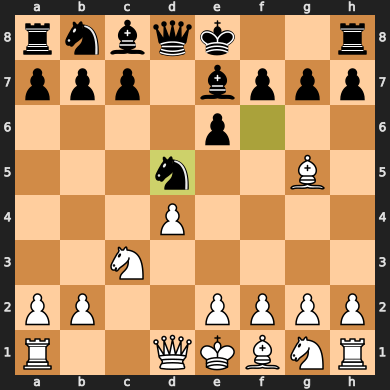

In [24]:
import chess

board = chess.Board()

for _ in range(10):
    if board.is_checkmate():
        break
    stockfish.set_fen_position(board.fen())

    board.push_uci(stockfish.get_best_move())
board

In [25]:
board.fen()

'rnbqk2r/ppp1bppp/4p3/3n2B1/3P4/2N5/PP2PPPP/R2QKBNR w KQkq - 0 6'

64
65
156


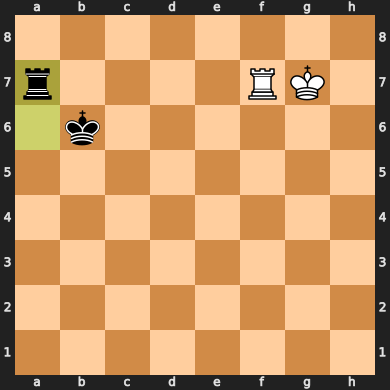

In [26]:
import chess

board = chess.Board()

hits_white = 0
hits_black = 0
eval_list = []

for idx, move in enumerate(moves):
    stockfish.set_fen_position(board.fen())
    eval = stockfish.get_evaluation()
    if eval['type'] == 'cp':
        eval_list.append(eval['value'])
    best_moves_dict = stockfish.get_top_moves(3)
    best_moves = [move['Move'] for move in best_moves_dict]
    if board.parse_san(move).uci() in best_moves and idx % 2 == 0:
        hits_white += 1
    elif board.parse_san(move).uci() in best_moves and idx % 2 == 1:
        hits_black += 1
    board.push_san(move)
print(hits_white)
print(hits_black)
print(len(moves))
board

[31, 19, 20, 16, 24, 19, 22, 23, 31, -15, -18, -31, -31, -18, -22, -34, 52, 47, 83, 91, 94, 97, 108, 114, 106, 107, 113, 97, 101, 105, 139, 116, 172, 154, 211, 206, 234, 63, 90, 86, 81, 49, 61, 90, 121, 70, 94, 72, 69, 101, 66, 57, 67, 67, 60, 62, 65, 63, 57, 70, 63, 63, 52, 61, 67, 54, 67, 25, 31, 25, 33, 20, 19, 34, 31, 30, 26, 29, 36, 24, 29, 32, 39, 26, 22, 30, 134, 28, 207, 16, 202, 47, 33, 41, 38, 9, 393, 414, 424, 425, 427, 446, 439, 438, 449, 143, 176, 171, 289, 11, 21, 4, 16, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 8, 5, 6, 7, 289, 373, 368, 0, 2, 1, 0, 0, 0, 7, 7, 1, 6, 0, 5, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
75.42307692307692


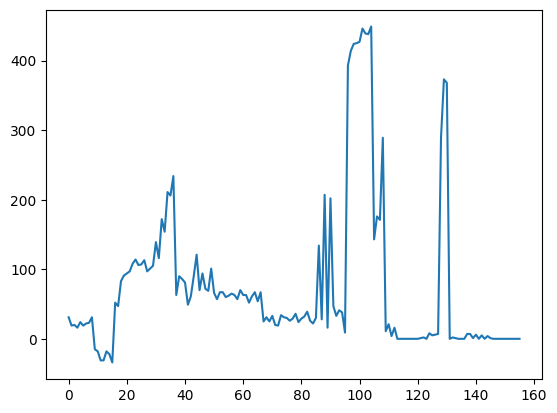

In [27]:
import numpy as np
from matplotlib import pyplot as plt
print(eval_list)
print(np.mean(eval_list))
plt.plot(eval_list)

In [28]:
board = chess.Board()
print(board.fen())
board.push_san('e4')
print(board.fen())
board.push_san('d5')
print(board.fen())
board.push_san('exd5')
print(board.fen())
board.push_san('Nc6')
print(board.fen().split()[0])
print(board)

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1
rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2
rnbqkbnr/ppp1pppp/8/3P4/8/8/PPPP1PPP/RNBQKBNR b KQkq - 0 2
r1bqkbnr/ppp1pppp/2n5/3P4/8/8/PPPP1PPP/RNBQKBNR
r . b q k b n r
p p p . p p p p
. . n . . . . .
. . . P . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


In [29]:
piece_to_onehot = {'r' :        [1,0,0,0,0,0,0,0,0,0,0,0],
                   'n' :        [0,1,0,0,0,0,0,0,0,0,0,0],
                   'b' :        [0,0,1,0,0,0,0,0,0,0,0,0],
                   'q' :        [0,0,0,1,0,0,0,0,0,0,0,0],
                   'k' :        [0,0,0,0,1,0,0,0,0,0,0,0],
                   'p' :        [0,0,0,0,0,1,0,0,0,0,0,0],
                   'R' :        [0,0,0,0,0,0,1,0,0,0,0,0],
                   'N' :        [0,0,0,0,0,0,0,1,0,0,0,0],
                   'B' :        [0,0,0,0,0,0,0,0,1,0,0,0],
                   'Q' :        [0,0,0,0,0,0,0,0,0,1,0,0],
                   'K' :        [0,0,0,0,0,0,0,0,0,0,1,0],
                   'P' :        [0,0,0,0,0,0,0,0,0,0,0,1],
                   'empty' :    [0,0,0,0,0,0,0,0,0,0,0,0]}
piece_to_token   = {'r' :        1,
                   'n' :        2,
                   'b' :        3,
                   'q' :        4,
                   'k' :        5,
                   'p' :        6,
                   'R' :        7,
                   'N' :        8,
                   'B' :        9,
                   'Q' :        10,
                   'K' :        11,
                   'P' :        12,
                   'empty' :    0}

def fen_to_network_input_one_hot(fen):
    encoded_board = []
    fen = fen.split()[0]
    for char in fen:
        if char in piece_to_onehot.keys():
            encoded_board.append(piece_to_onehot[char])
        elif char != '/':
            for _ in range(int(char)):
                encoded_board.append(piece_to_onehot['empty'])
    return encoded_board


def fen_to_network_input_tokenized(fen):
    encoded_board = []
    fen = fen.split()[0]
    for char in fen:
        if char in piece_to_token.keys():
            encoded_board.append(piece_to_token[char])
        elif char != '/':
            for _ in range(int(char)):
                encoded_board.append(piece_to_token['empty'])
    return encoded_board

In [30]:
tokenized_board = fen_to_network_input_tokenized(board.fen())
encoded_board = fen_to_network_input_one_hot(board.fen())
print(tokenized_board)
print(encoded_board)

[1, 0, 3, 4, 5, 3, 2, 1, 6, 6, 6, 0, 6, 6, 6, 6, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 12, 0, 12, 12, 12, 7, 8, 9, 10, 11, 9, 8, 7]
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
type(encoded_board[0])

list

In [33]:
from torch import nn
import torch

embedding = nn.Embedding(13,3)

tokenized_board = torch.IntTensor(tokenized_board)

embedded_board = embedding(tokenized_board)
embedded_board #.reshape(1,192)

tensor([[-1.5333e+00, -1.0071e-01, -2.8327e-01],
        [-2.6790e+00, -8.6080e-01,  1.2998e+00],
        [ 8.9134e-01,  7.4522e-01,  6.8867e-01],
        [-4.2230e-01, -8.8948e-01, -1.2564e+00],
        [-2.2589e-02, -2.0967e-01, -8.1861e-01],
        [ 8.9134e-01,  7.4522e-01,  6.8867e-01],
        [-3.9726e-01, -5.2085e-01,  5.5705e-01],
        [-1.5333e+00, -1.0071e-01, -2.8327e-01],
        [ 2.6509e-01,  3.5473e-01, -7.2902e-01],
        [ 2.6509e-01,  3.5473e-01, -7.2902e-01],
        [ 2.6509e-01,  3.5473e-01, -7.2902e-01],
        [-2.6790e+00, -8.6080e-01,  1.2998e+00],
        [ 2.6509e-01,  3.5473e-01, -7.2902e-01],
        [ 2.6509e-01,  3.5473e-01, -7.2902e-01],
        [ 2.6509e-01,  3.5473e-01, -7.2902e-01],
        [ 2.6509e-01,  3.5473e-01, -7.2902e-01],
        [-2.6790e+00, -8.6080e-01,  1.2998e+00],
        [-2.6790e+00, -8.6080e-01,  1.2998e+00],
        [-3.9726e-01, -5.2085e-01,  5.5705e-01],
        [-2.6790e+00, -8.6080e-01,  1.2998e+00],
        [-2.6790e+00

In [14]:
# an Embedding module containing 10 tensors of size 3
embedding = nn.Embedding(10, 3)
# a batch of 2 samples of 4 indices each
input = torch.LongTensor([[1, 2, 4, 5], [4, 3, 2, 9]])
embedding(input)

tensor([[[ 0.0034, -0.2292,  0.7096],
         [ 1.3901, -0.2320, -1.0522],
         [-0.7315,  0.1303,  0.6914],
         [-0.0308,  0.4212, -0.9867]],

        [[-0.7315,  0.1303,  0.6914],
         [ 0.1654, -0.8459,  1.0470],
         [ 1.3901, -0.2320, -1.0522],
         [ 2.1744, -0.3028,  0.0225]]], grad_fn=<EmbeddingBackward0>)

In [2]:
import zstandard

archive = 'lichess_db_standard_rated_2014-03.pgn.zst'

with open(archive, 'rb') as compressed:
        decomp = zstandard.ZstdDecompressor()
        output_path = 'lichess_db_201403.pgn'
        with open(output_path, 'wb') as destination:
            decomp.copy_stream(compressed, destination)

In [154]:
import re
with open('lichess_db_201403.pgn', 'r') as f:
    games = []
    game = []
    for i in range(14_000_000):
        line = f.readline()
        if re.match('\[Site', line) is not None:
            site = line
            # continue
        # else:
        #     site = None
        elif re.match('\[Result', line) is not None:
            result = line
            # continue
        # else:
        #     result = None
        elif re.match('\[WhiteElo', line) is not None:
            white_elo = line
            # continue
        # else:
        #     white_elo = None
        elif re.match('\[BlackElo', line) is not None:
            black_elo = line
        #     continue
        # else:
        #     black_elo = None
        elif re.match('1\.', line) is not None:
            moves = line
            game = [site, result, white_elo, black_elo, moves]
            games.append(game)

len(games)

778649

In [155]:
c = 0
for game in games:
    if len(game)>5:
        # print(game)
        c += 1
print(c)

0


In [156]:
import pandas as pd

df = pd.DataFrame(games, columns=['Site', 'Result', 'WhiteElo', 'BlackElo', 'Moves'])

In [164]:
df.to_csv('lichess_db_pgn_to_csv.csv')